# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv', sep=",")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Counting rows and columns
shape = df.shape
print ("There are {} rows and {} columns on the dataset".format(shape[0], shape[1]))


There are 1898 rows and 9 columns on the dataset


#### Observations:
There are 1898 rows and 9 columns on the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:
Dataset have 4 variables int format, 4 object (string) format variables and one float variable.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

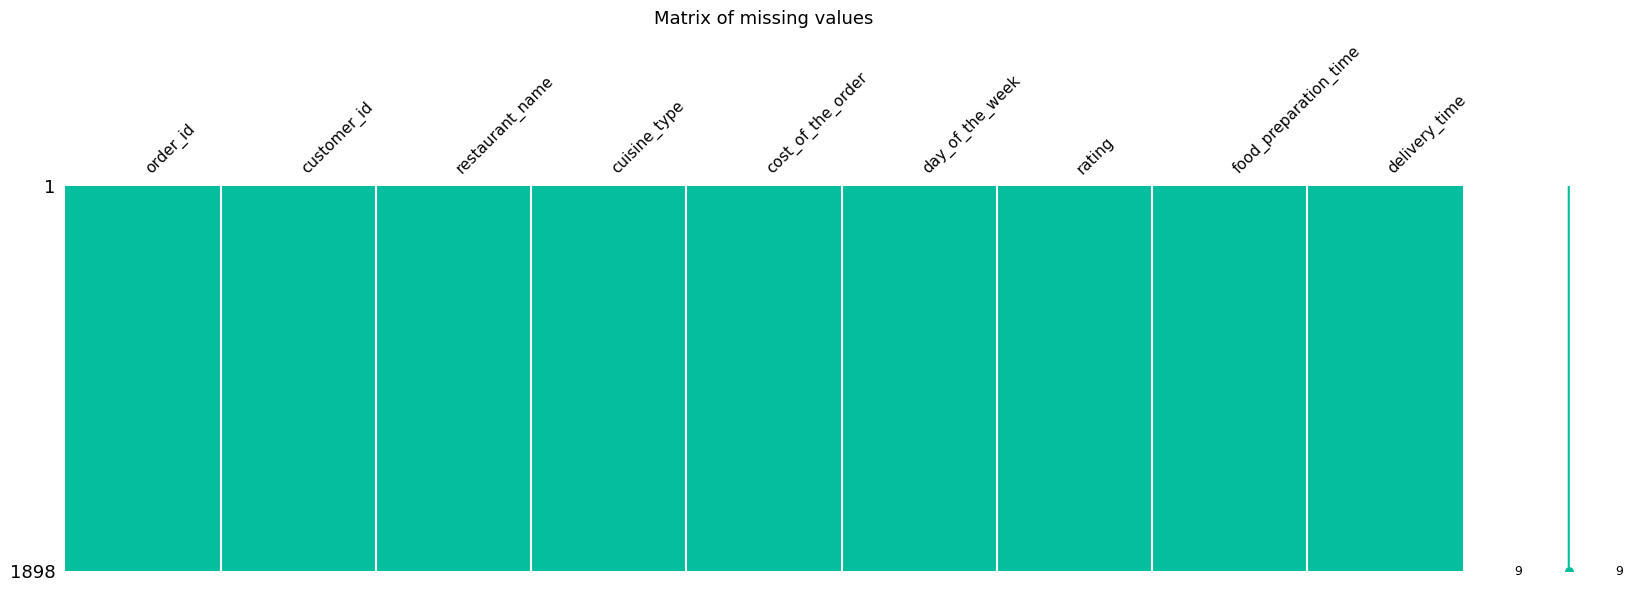

In [6]:
msno.matrix(df, fontsize=11, color=(0.0157, 0.749, 0.6157),figsize=(20, 5))
plt.title('Matrix of missing values', y=1.4, fontsize=13)
plt.show()

#### Observations:

There are no missing values on the Dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:

For variable food preparation time:

- minimum time is: 20.0 min
- maximum time is: 35.0 min
- average time is: 27.4 min

### **Question 5:** How many orders are not rated?

In [8]:
# Checking the unique values on variable rating
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [9]:
# Obtaining the number of not rated orders 
not_given_count = df['rating'].value_counts().get('Not given')
print(f"Number of orders not rated: {not_given_count}")


Number of orders not rated: 736


#### Observations:

- There are 736 orders without rate.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [11]:
# Let's check for duplicate rows
duplicates= df.duplicated()
num_duplicates = sum(duplicates)
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


- There are no duplicated rows

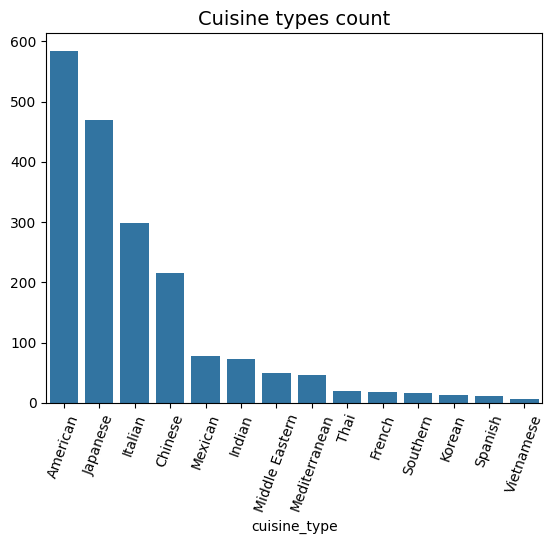

In [12]:
# Let´s see proportion of Cuisine types
# Counting the number of each cuisine type
counts = df['cuisine_type'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=70) 
plt.title('Cuisine types count', fontsize=14)
plt.show()

- The majority of the restaurant's cuisine types are American, Japanese, Italian, and Chinese.

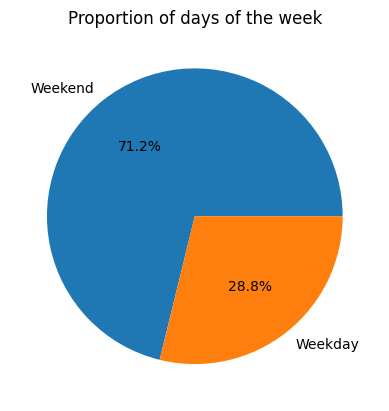

In [13]:
#Calculating the proportion of days of the week
counts = df['day_of_the_week'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Proportion of days of the week')
plt.show()

- The majority of the data comes from the weekend (71.2%).

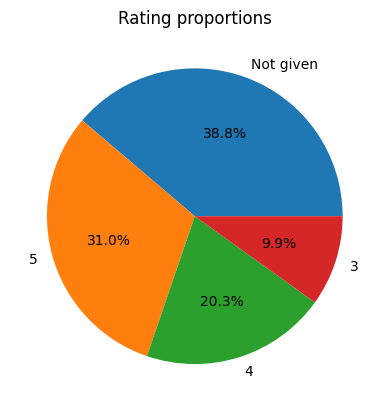

In [14]:
#Calculating the proportion of ratings
counts = df['rating'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Rating proportions')
plt.show()

- A significant portion of users didn’t provide ratings(38.8%), indicating potential disengagement or lack of incentive to rate.
- Positive feedback dominates: 31% of users gave a 5-star rating, suggesting strong satisfaction among many customers.

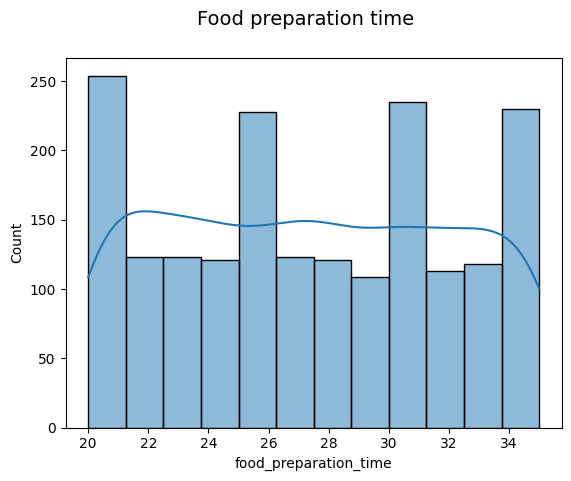

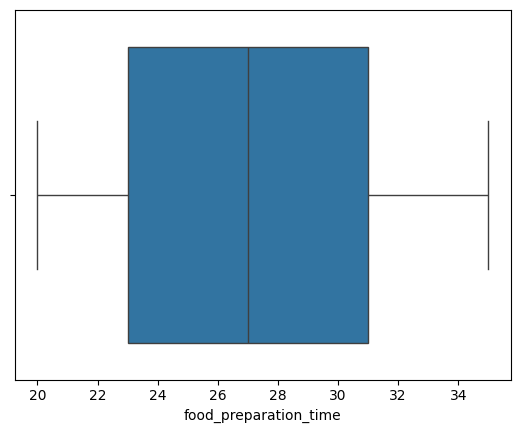

In [15]:
# Let´s see distribution of food_preparation_time 
plt.suptitle("Food preparation time", fontsize=14)
sns.histplot(data=df, x="food_preparation_time",  kde=True)
plt.show()

sns.boxplot(data =df, x="food_preparation_time")
plt.show()


- The distribution of food_preparation_time seems to be uniform, with values evenly spread across the range and no apparent outliers.

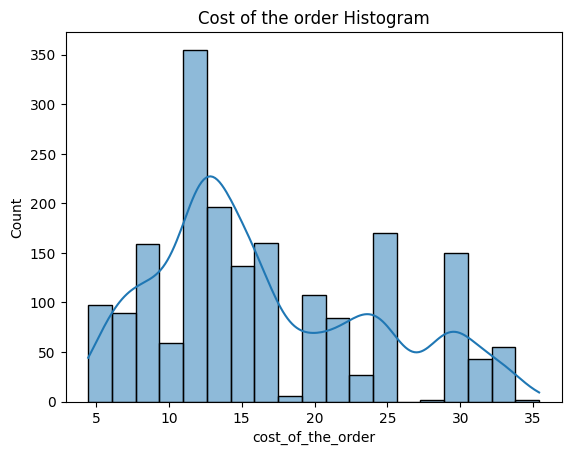

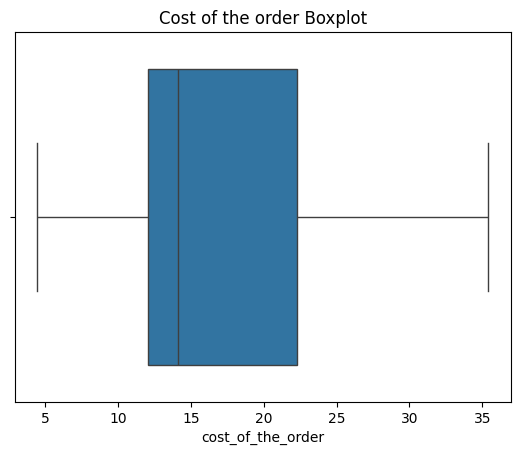

In [16]:
# Cost of the order
plt.title("Cost of the order Histogram")
sns.histplot(data=df, x="cost_of_the_order",  kde=True)
plt.show()

sns.boxplot(data =df, x="cost_of_the_order")
plt.title("Cost of the order Boxplot")
plt.show()


- The distribution of cost_of_the_order appears to be right-skewed, with values concentrated towards the lower end and a tail extending to the right. 
- There are no apparent outliers, as indicated by the boxplot.

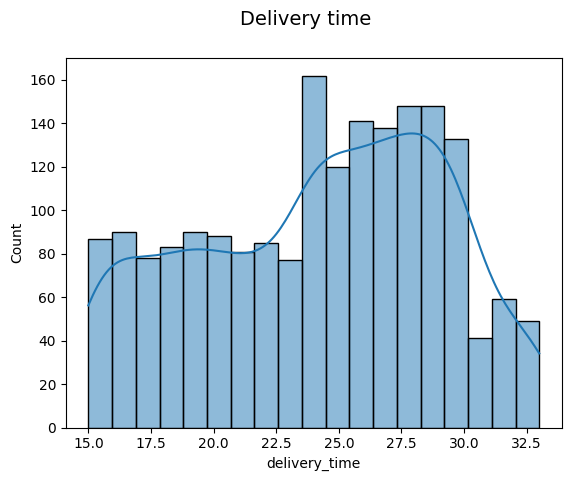

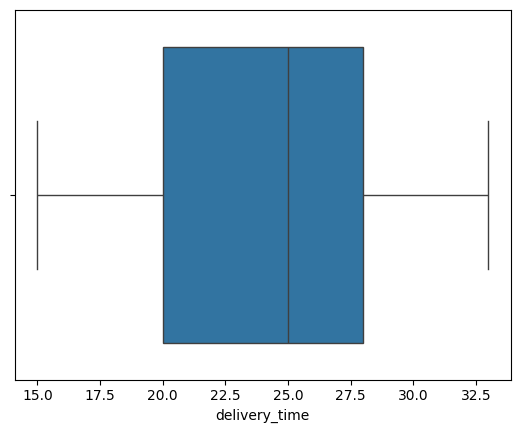

In [17]:
# Let´s see distribution of delivery_time 
plt.suptitle("Delivery time", fontsize=14)
sns.histplot(data=df, x="delivery_time",bins=19,  kde=True)
plt.show()

sns.boxplot(data =df, x="delivery_time")
plt.show()

- The distribution of delivery:time appears to be slightly left-skewed. 
- There are no apparent outliers, as indicated by the boxplot.

#### Observations:

- **Cuisine Types**:  
  The majority of the restaurant's cuisine types are **American**, **Japanese**, **Italian**, and **Chinese**.

- **Weekend Data Proportion**:  
  The majority of the data comes from the weekend, comprising **71.2%** of the total.

- **Rating Insights**:  
  - A significant portion of users didn’t provide ratings (**38.8%**), indicating potential disengagement or lack of incentive to rate.
  - Positive feedback dominates, as **31%** of users gave a 5-star rating, suggesting strong customer satisfaction.

- **Food Preparation Time**:  
  The distribution of food preparation time appears to be **uniform**, with values evenly spread across the range and no apparent outliers.

- **Cost of the Order**:  
  - The distribution of the cost of orders is **right-skewed**, with values concentrated at the lower end and a tail extending to the right.  
  - There are **no apparent outliers**, as indicated by the boxplot.

- **Delivery Time**:  
  - The distribution of delivery time appears to be **slightly left-skewed**.  
  - There are **no apparent outliers**, as indicated by the boxplot.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [18]:
# Calculating top 5 restaurants by orders recieved
top_5_restaurants = df.groupby("restaurant_name").size().sort_values(ascending=False).head(5)
top_5_restaurants

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:
- Shake Shack is the restaurant with the highest number of orders received (219), followed by The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).


### **Question 8**: Which is the most popular cuisine on weekends?

In [19]:
# Filter and get the most popular cuisine on weekends
most_popular = df[df["day_of_the_week"] == "Weekend"]["cuisine_type"].value_counts().nlargest(1)

print(f"The most popular cuisine on weekends is {most_popular.index[0]} with {most_popular.iloc[0]} orders.")



The most popular cuisine on weekends is American with 415 orders.


#### Observations:

- The most popular cuisine on weekends is American with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [20]:
# Filter and get the orders with cost above 20
orders_above_20 = df[df["cost_of_the_order"]> 20]

# Calculate num of orders above 20
orders_above_20_count = orders_above_20.shape[0]

# calculate total num of orders
total_orders = df.shape[0]

# calculate the percentage of orders above 20
percentage = (orders_above_20_count /total_orders) * 100

print(f"The percentage of orders above $20 is {percentage:.1f}%")


The percentage of orders above $20 is 29.2%


- The percentage of orders above $20 is 29.2%

#### Observations:


### **Question 10**: What is the mean order delivery time?

In [21]:
# calculate the mean of delivery time
mean_delivery_time = round(df["delivery_time"].mean(),1)
print(f"The mean delivery time is {mean_delivery_time} minutes.")

The mean delivery time is 24.2 minutes.


#### Observations:

The mean delivery time is 24.2 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [22]:
# Identifying the Top 3 Customers with the Most Orders
df.groupby("customer_id")["customer_id"].count().sort_values(ascending=False).head(3)



customer_id
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

- The customers with the highest number of orders are 52832, 47440, and 83278.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

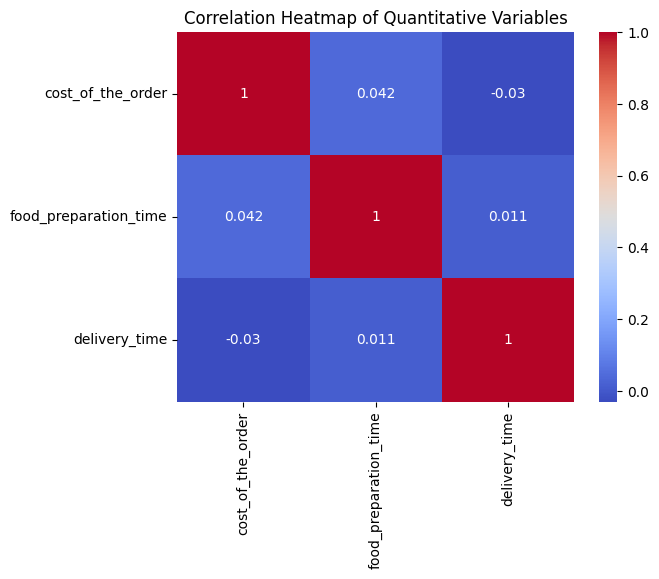

In [24]:
# important variables
quantitative_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
qualitative_vars = ['day_of_the_week', 'rating', 'cuisine_type']

# Heat map of correlation between quantitative variables
sns.heatmap(df[quantitative_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Quantitative Variables')
plt.show()

- There is no correlation between the quantitative variables.

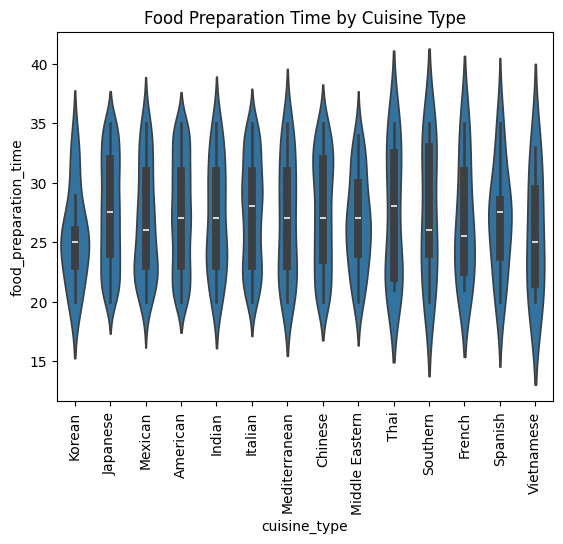

In [25]:
# Violin graph for 'food_preparation_time' by 'cuisine_type'
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.title('Food Preparation Time by Cuisine Type')
plt.show()

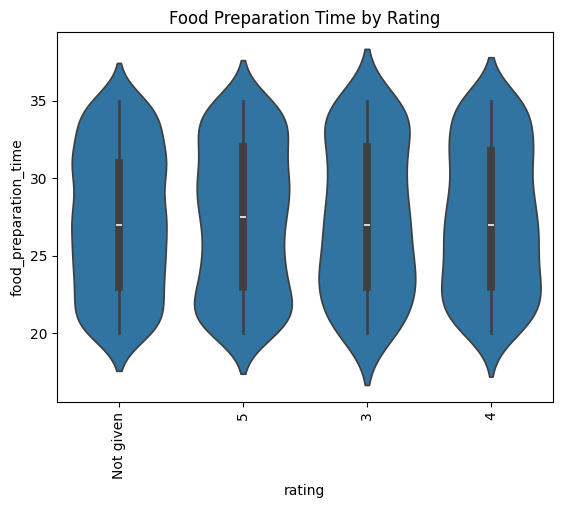

In [26]:
# violin plot for food preparation time by 'rating'

sns.violinplot(x='rating', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.title('Food Preparation Time by Rating')
plt.show()


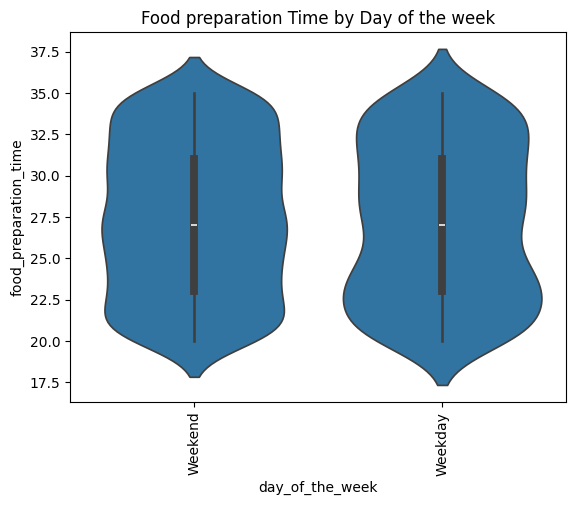

In [52]:
# violin plot for food preparation time by 'day_of_the_week'
sns.violinplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.title('Food preparation Time by Day of the week')
plt.show()

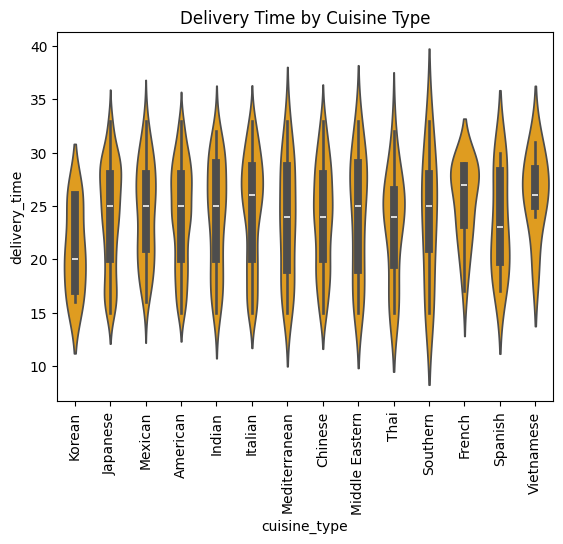

In [39]:
# Violin graph for 'delivery_time' by 'cuisine_type'
sns.violinplot(x='cuisine_type', y='delivery_time', data=df, color='orange')
plt.xticks(rotation=90)
plt.title('Delivery Time by Cuisine Type')
plt.show()

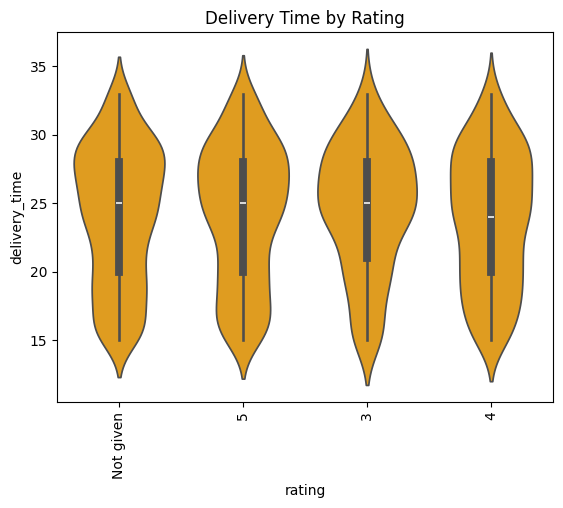

In [38]:
# Violin graph for 'delivery_time' by 'cuisine_type'
sns.violinplot(x='rating', y='delivery_time', data=df, color='orange')
plt.xticks(rotation=90)
plt.title('Delivery Time by Rating')
plt.show()

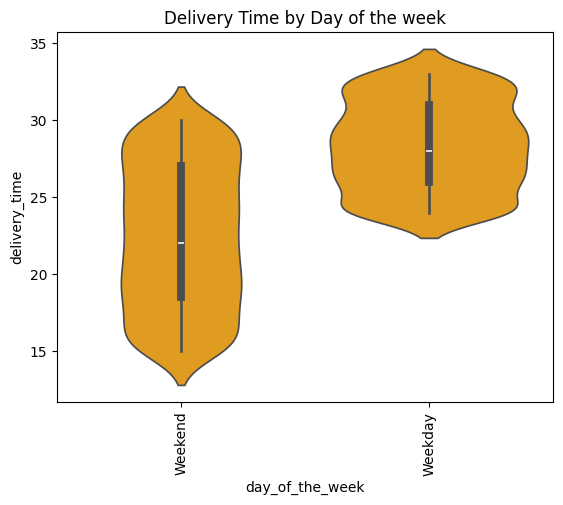

In [41]:
# Violin graph for 'delivery_time' by 'day_of_the_week'
sns.violinplot(x='day_of_the_week', y='delivery_time', data=df, color='orange')
plt.xticks(rotation=90)
plt.title('Delivery Time by Day of the week')
plt.show()

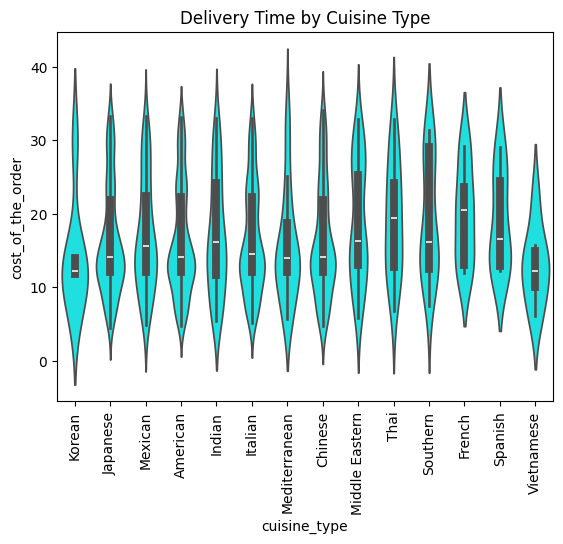

In [43]:
# Violin graph for 'delivery_time' by 'cuisine_type'
sns.violinplot(x='cuisine_type', y='cost_of_the_order', data=df, color='cyan')
plt.xticks(rotation=90)
plt.title('Delivery Time by Cuisine Type')
plt.show()

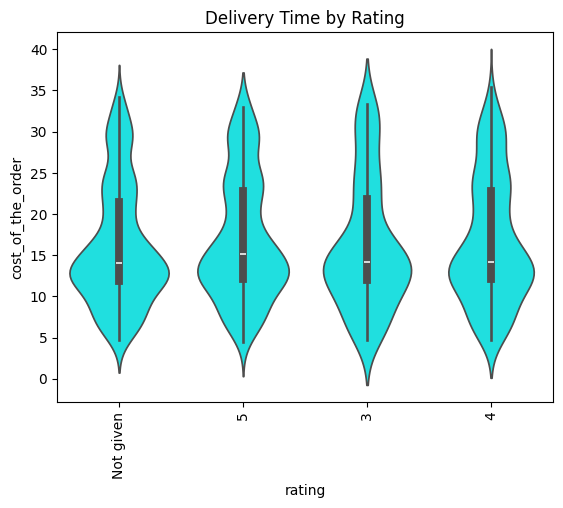

In [44]:
# Violin graph for 'delivery_time' by 'cuisine_type'
sns.violinplot(x='rating', y='cost_of_the_order', data=df, color='cyan')
plt.xticks(rotation=90)
plt.title('Delivery Time by Rating')
plt.show()

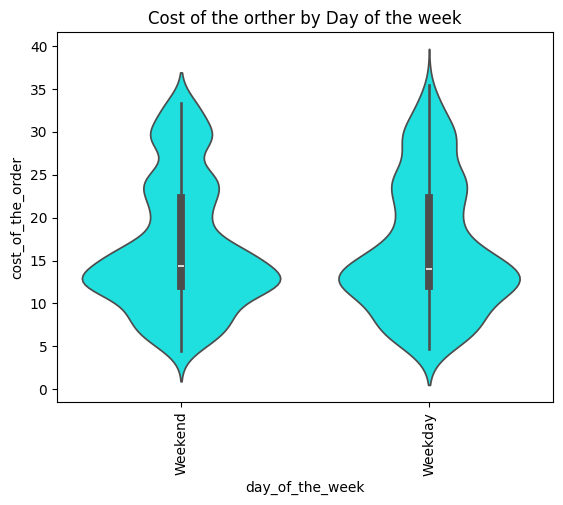

In [50]:
# Violin graph for 'cost_of_the_order' by 'rating'
sns.violinplot(x='day_of_the_week', y='cost_of_the_order', data=df, color='cyan')
plt.xticks(rotation=90)
plt.title('Cost of the orther by Day of the week')
plt.show()

#### Observations:
- There is no correlation between the quantitative variables.
- There is no apparent effect of **'day_of_the_week'** and **'cuisine_type'** on the **'cost_of_the_order'** and **'food_preparation_time'**.
  
- **'Cuisine_type'** does not appear to affect the delivery time.

- **'Cost_of_the_order'**, **'food_preparation_time'**, and **'delivery_time'** do not appear to have an effect on the **'rating'**.

- The most important finding is that delivery time seems to be **higher on weekdays than on weekends**.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [29]:
# Creating a new column to store only ratings provided
df['rating_provided'] = df['rating'].apply(lambda x: np.nan if x == 'Not given' else x)

# Convert 'rating_provided' column to float
df['rating_provided'] = pd.to_numeric(df['rating_provided'], errors='coerce')

# Group by restaurant name and calculate the count and mean of ratings provided
rest = df.groupby("restaurant_name")["rating_provided"].agg(["count","mean"]).reset_index()

# Filter restaurants with rating count greater than 50 and mean rating greater than 4
filtered_restaurants = rest[(rest['count'] > 50) & (rest['mean'] > 4)]
filtered_restaurants

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations:

There are only four restaurants that meet the requirements. They are:

- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop"

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [30]:
# filtering orders with a cost above 20
orders_above_20 = df[df["cost_of_the_order"] > 20]
# calculating the total number of orders above 20
orders_above_20_count = orders_above_20.shape[0]

# filtering orders with a cost above 5 and equal or less than 20
orders_above_5_below_20 = df[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20)]
# calculating the total number of orders above 5 and equal or less than 20
orders_above_5_below_20_count = orders_above_5_below_20.shape[0]

# calculating net revenue
net_revenue = orders_above_20_count * 20 + orders_above_5_below_20_count * 5

print(f"The net revenue is ${net_revenue}")

The net revenue is $17770


#### Observations:
- The net revenue is $17770


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [31]:
# crating a new column with the total time riquired from ordering to delivery
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

# calculating percentage of orders with total time above 60 minutes
orders_above_60 = df[df["total_time"] > 60]
orders_above_60_count = orders_above_60.shape[0]
total_orders = df.shape[0]
percentage = (orders_above_60_count / total_orders) * 100

print(f"The percentage of orders with total time above 60 minutes is {percentage:.1f}%")


The percentage of orders with total time above 60 minutes is 10.5%


#### Observations:

- The percentage of orders with total time above 60 minutes is 10.5%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [59]:
# Calculate the mean and standard deviation of delivery time by day type
delivery_stats = df.groupby('day_of_the_week')['delivery_time'].agg(['mean', 'std']).reset_index()
delivery_stats

,day_of_the_week,mean,std
0,Weekday,28.340037,2.891428
1,Weekend,22.470022,4.628938


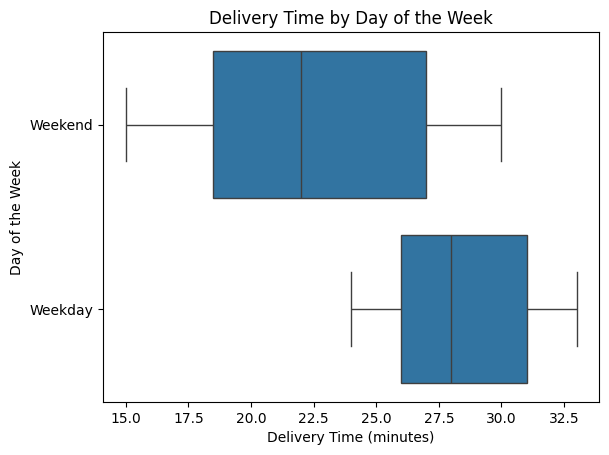

In [60]:
# Filtering the data for the t-test
weekday_orders = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']['delivery_time']

# Visualization with boxplot
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Day of the Week')
plt.show()

In [57]:
from scipy.stats import ttest_ind
# Performing the independent samples t-test with unequal variances
t_stat, p_value = ttest_ind(weekday_orders, weekend_orders, equal_var=False)
alpha = 0.05  # Significance level corresponding to a 95% confidence level

# Displaying the test results with the confidence level
print(f"The p-value is {p_value}")

# Interpreting the p-value in the context of the confidence level
if p_value < alpha:
    print(f"At the {100 * (1 - alpha)}% confidence level, there is a statistically significant difference in delivery times between weekdays and weekends.")
else:
    print(f"At the {100 * (1 - alpha)}% confidence level, there is no statistically significant difference in delivery times between weekdays and weekends.")

The p-value is 2.5737146093950945e-184
At the 95.0% confidence level, there is a statistically significant difference in delivery times between weekdays and weekends.


#### Observations:

- At the 95.0% confidence level, there is a statistically significant difference in delivery times between weekdays and weekends.

- The mean delivery time is higher on weekdays than on weekends.


### Conclusion and Recommendations

Conclusion:
- The mean delivery time is higher on weekdays than on weekends.

Recommendations:
- Resource Allocation:
    - Increase Staffing on Weekdays: Allocate more delivery personnel and resources during weekdays to handle the higher demand and mitigate delays.
    - Flexible Scheduling: Implement flexible work schedules to ensure peak times are adequately staffed.

- Conduct Further Research:

    - Time of Day Impact: Examine whether certain times during weekdays have longer delivery times.
    - Geographical Factors: Investigate if specific areas or routes are more affected by delays.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:


1. **Higher delivery times on weekdays**: There is a statistically significant difference in delivery times between weekdays and weekends, with weekdays having longer delivery times. This might be due to higher demand or increased traffic during workdays.
2. **No strong impact of cuisine type on key metrics**: The type of cuisine doesn't appear to significantly affect delivery time, order cost, or food preparation time.
3. **Order characteristics and customer ratings**: There is no clear relationship between factors like delivery time, order cost, or preparation time and the customer ratings, suggesting other factors (e.g., food quality) are influencing customer satisfaction.
4. **High percentage of orders without ratings**: A large proportion of orders are not rated, limiting insights into customer satisfaction and areas for improvement.



### Recommendations:

1. **Optimize resource allocation**:
   - **Increase staffing on weekdays**: Given the higher delivery times on weekdays, consider allocating more delivery personnel or resources during peak weekday hours to reduce delays.
   - **Flexible scheduling**: Implement flexible work schedules to ensure that peak times, such as lunch and dinner hours, are fully staffed.

2. **Enhance customer feedback collection**:
   - **Incentivize ratings**: Offer small rewards such as discounts or loyalty points to encourage customers to rate their orders.
   - **Streamline rating process**: Simplify the rating process within the app, making it quick and effortless for users to provide feedback.
   - **Send reminders**: Utilize push notifications to remind customers to rate their orders, highlighting the importance of their feedback in improving service.

3. **Further research**:
   - **Time of day analysis**: Investigate whether certain times of day during weekdays experience longer delivery times, enabling more precise resource planning.
   - **Geographical analysis**: Explore whether specific areas face higher delivery delays, allowing for potential route optimization.

---

In [62]:
# convert notebook to html
! jupyter nbconvert --to html  'FDS_Project_LearnerNotebook_FullCode.ipynb'



usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbconvert` not found.
